# USENIX MAJOR REVISION SCRATCHPAD
Author: Logan Blue
Date: June 2, 2021

In [1]:
import pandas 
import seaborn as sns
import pickle


In [2]:
with open('df_results.pkl', 'rb') as f:
    df_results = pickle.load(f)

In [3]:
df_results.reset_index(inplace=True)
df_results.head()

,index,filepath,dataset,area_index,min,max,start_bigram,end_bigram,window_start,window_end,window_index,breaks_max,breaks_min,max_pred,min_pred
0,0,E:\SynologyDrive\Research\guesswho_new\guesswh...,fakes,7.0,1.682310,904.179782,24148.661417,25811.425197,26446.314961,27011.314961,2.480315,0.012598,0.088714,True,True
1,1,E:\SynologyDrive\Research\guesswho_new\guesswh...,fakes,7.0,1.589533,606.135566,21354.563107,23376.854369,23737.252427,24302.252427,2.766990,0.009061,0.073139,True,True
2,2,E:\SynologyDrive\Research\guesswho_new\guesswh...,fakes,7.0,1.818773,181.634507,29609.208633,30989.352518,33086.575540,33651.575540,2.244604,0.021583,0.078657,True,True
3,3,E:\SynologyDrive\Research\guesswho_new\guesswh...,fakes,7.0,1.903779,90.120366,20832.307692,22524.615385,24355.115385,24920.115385,4.634615,0.075000,0.115385,True,True
4,4,E:\SynologyDrive\Research\guesswho_new\guesswh...,fakes,7.0,1.644400,414.916391,19488.571429,20835.714286,22556.276786,23121.276786,1.839286,0.000000,0.054167,False,True


In [9]:
df_results.filepath.nunique()

20

<AxesSubplot:xlabel='breaks_max', ylabel='Count'>

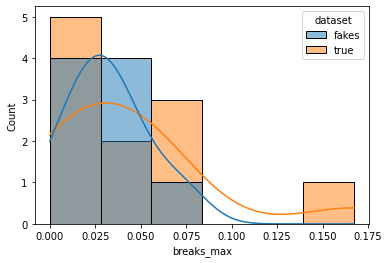

In [7]:
sns.histplot(data=df_results, x="breaks_max", hue='dataset', kde=True)

<AxesSubplot:xlabel='breaks_min', ylabel='Count'>

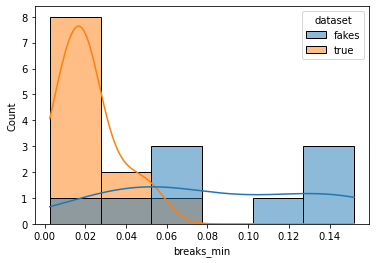

In [8]:
sns.histplot(data=df_results, x="breaks_min", hue='dataset', kde=True)

In [10]:
with open('df_lyrebird_results.pkl', 'rb') as f:
    df_results = pickle.load(f)

<AxesSubplot:xlabel='breaks_max', ylabel='Count'>

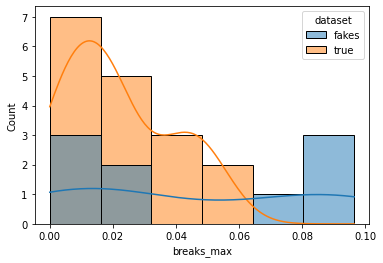

In [11]:
sns.histplot(data=df_results, x="breaks_max", hue='dataset', kde=True)

<AxesSubplot:xlabel='breaks_min', ylabel='Count'>

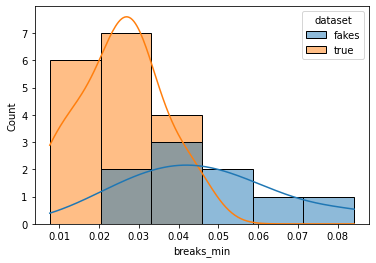

In [12]:
sns.histplot(data=df_results, x="breaks_min", hue='dataset', kde=True)

In [14]:
df_results.head()

,filepath,dataset,area_index,min,max,threshold,recall,precision,start_bigram,end_bigram,window_start,window_end,window_index,breaks_max,breaks_min,max_pred,min_pred
0,/home/logan/SynologyDrive/Research/guesswho_ne...,fakes,7.0,1.744210,509.687484,-0.770654,-0.863583,-0.867120,94692.935323,95586.800995,97035.597015,97600.597015,1.442786,0.096517,0.038143,True,False
1,/home/logan/SynologyDrive/Research/guesswho_ne...,fakes,7.0,1.805783,478.529695,-0.733851,-0.839377,-0.843595,263286.464088,264234.845304,266147.359116,266712.359116,1.486188,0.079558,0.043831,True,False
2,/home/logan/SynologyDrive/Research/guesswho_ne...,fakes,7.0,1.679558,308.871127,-0.794026,-0.877152,-0.881026,468285.666667,469266.580808,470469.469697,471034.469697,1.540404,0.085859,0.026936,True,False
3,/home/logan/SynologyDrive/Research/guesswho_ne...,fakes,7.0,1.765488,323.846842,-0.758955,-0.848464,-0.852746,625355.887500,626430.868750,628064.543750,628629.543750,1.412500,0.087500,0.021250,True,False
4,/home/logan/SynologyDrive/Research/guesswho_ne...,fakes,7.0,1.650447,185.188178,-0.844603,-0.911772,-0.914024,99557.073171,100635.776423,102430.520325,102995.520325,1.491870,0.009485,0.047967,True,False


## Creating the asv attack subsets

In [3]:
#ASV_SPOOF (needs to load multiple mongo collections and then                
#concatenate                                                                 
#add dataset label   
from tqdm import tqdm
import pymongo
import pandas as pd

#load data                                                                       
def load_data(table_name, collection_name='exploration'):                        
    """load the data from a specified table for analysis"""                      
    myclient = pymongo.MongoClient('mongodb://localhost:27017')                  
    db = myclient[collection_name]                                               
    table = db[table_name]                                                       
                                                                                 
    return pd.DataFrame(list(table.find()))                                      
                                                                                 
def process_df(df):                                                              
    """This function will clean up my dataframe and explore out the different    
    cross_sect_est into their own rows"""                                        
    df = df.drop(columns=['_id'])                                                
                                                                                 
    #explode data                                                                
    df_exp = df.explode('cross_sect_est')                                        
                                                                                 
    #add indices in the cross_sect_est                                           
    indices = []                                                                 
    for _, row in df.iterrows():                                                 
        areas = row['cross_sect_est']                                            
        indices += list(range(0, len(areas)))                                    
                                                                                 
    df_exp['area_index'] = indices                                               
                                                                                 
    return df_exp  

df_asv_sets = ['asv_spoof_b1', 'asv_spoof_b2_100000',                        
        'asv_spoof_b2_100k_200k', 'asv_spoof_b2_200k_300k',                  
        'asv_spoof_b2_300k_400k', 'asv_spoof_b2_400k_500k',                  
        'asv_spoof_b2_500k_600k', 'asv_spoof_b2_600k_700k',                  
        'asv_spoof_b2_700k_800k', 'asv_spoof_b2__800k_end']                  
                                                                             
list_df_asv = []                                                             
for name in tqdm(df_asv_sets, position=0, leave=True, desc='ASV Spoof...'):  
    list_df_asv.append(process_df(load_data(name))) 

ASV Spoof...: 100%|██████████| 10/10 [06:23<00:00, 38.35s/it]


In [5]:
df_asv = pd.concat(list_df_asv, ignore_index=True)                           
df_asv.reset_index(drop=True, inplace=True) 
pickle.dump(df_asv, open('df_asv.pkl', 'wb'))

In [6]:
#add dataset label                                                           
df_asv['dataset'] = 'fakes'                                              
df_asv.loc[df_asv.filepath.str.contains('bonafide'), 'dataset'] = 'true'
pickle.dump(df_asv, open('df_asv.pkl', 'wb'))

In [1]:
import pandas 
import seaborn as sns
import pickle


In [2]:
df_asv = pickle.load(open('df_asv.pkl', 'rb'))

In [5]:
new_column = []
from tqdm import tqdm
for index, row in tqdm(df_asv.head(20000000).iterrows(), leave=True, position=0, 
                       total=20000000):
    try:
        new_column.append(row.filepath[95:98])
    except:
        print(index)
        print(row.filepath[95:98])
        break

100%|██████████| 20000000/20000000 [29:16<00:00, 11384.72it/s]


In [6]:
'/home/logan/SynologyDrive/Research/Data_Stores/guesswho_fakes/ASV_spoof_usenix/batch_1/LA_0030/A18/LA_E_4540978.wav'[95:98]

'A18'

In [2]:
pickle.dump(new_column, open('first_20M.pkl', 'wb'))

NameError: name 'new_column' is not defined

In [14]:
new_column_2 = []
from tqdm import tqdm
for index, row in tqdm(df_asv.iloc[40000000:].iterrows(), leave=True, position=0, 
                       total=len(df_asv.iloc[40000000:])):
    try:
        new_column_2.append(row.filepath[95:98])
    except:
        print(index)
        print(row.filepath[95:98])
        break

100%|██████████| 12394415/12394415 [18:30<00:00, 11160.15it/s]


In [15]:
pickle.dump(new_column_2, open('40M_up.pkl', 'wb'))

In [3]:
#combine the new datasets
first = pickle.load(open('asv_data_files/first_20M.pkl', 'rb'))
second = pickle.load(open('asv_data_files/20M_40M.pkl', 'rb'))
third = pickle.load(open('asv_data_files/40M_up.pkl', 'rb'))

In [4]:
total = first + second + third
len(total)

52394415

In [5]:
df_asv['atk_num'] = total

In [6]:
pickle.dump(df_asv, open('df_asv_complete.pkl', 'wb'))

In [9]:
for key, grp in df_asv.groupby('atk_num'):
    #save to pickle file
    print("Saving ", key, "...")
    pickle.dump(grp, open('df_asv_' + key + '.pkl', 'wb'))

Saving  A07 ...
Saving  A08 ...
Saving  A09 ...
Saving  A10 ...
Saving  A11 ...
Saving  A12 ...
Saving  A13 ...
Saving  A14 ...
Saving  A15 ...
Saving  A16 ...
Saving  A17 ...
Saving  A18 ...
Saving  A19 ...
Saving  bon ...
